# Import Data




In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)


Mounted at /content/drive


In [ ]:
figuresPath = '/content/drive/MyDrive/Colab Notebooks/data/arabica_data_cleaned.csv'

In [ ]:
import pandas as pd

# load data
df = pd.read_csv(figuresPath)

In [ ]:
# preview the data
df.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
# Data Frame information (null, data type etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1310 non-null   int64  
 1   Species                1310 non-null   object 
 2   Owner                  1303 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1164 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1310 non-null   int64  
 13  Bag.Weight             1310 non-null   object 
 14  In.Country.Partner     1310 non-null   object 
 15  Harv

# Handle missing values

In [ ]:
# Drop somthing we think they are not useful.
df = df.drop(['Unnamed: 0','Owner', 'Farm.Name', 'Lot.Number','Mill','ICO.Number','Company','Altitude','Owner.1','Certification.Address','Certification.Contact','Producer'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1310 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Region                1254 non-null   object 
 3   Number.of.Bags        1310 non-null   int64  
 4   Bag.Weight            1310 non-null   object 
 5   In.Country.Partner    1310 non-null   object 
 6   Harvest.Year          1264 non-null   object 
 7   Grading.Date          1310 non-null   object 
 8   Variety               1110 non-null   object 
 9   Processing.Method     1159 non-null   object 
 10  Aroma                 1310 non-null   float64
 11  Flavor                1310 non-null   float64
 12  Aftertaste            1310 non-null   float64
 13  Acidity               1310 non-null   float64
 14  Body                  1310 non-null   float64
 15  Balance              

In [ ]:
# Handle missing values
# replace missing values (i.e., NaNs) by mean
df['altitude_low_meters'].fillna((df['altitude_low_meters'].mean()), inplace=True)
df['altitude_high_meters'].fillna((df['altitude_high_meters'].mean()), inplace=True)
df['altitude_mean_meters'].fillna((df['altitude_mean_meters'].mean()), inplace=True)

In [ ]:
# replace missing values (i.e., NaNs) by mode
freq_ProcessingMethod = df['Processing.Method'].dropna().mode()[0]
df['Processing.Method'].fillna(freq_ProcessingMethod, inplace=True)

freq_HarvestYear = df['Harvest.Year'].dropna().mode()[0]
df['Harvest.Year'].fillna(freq_HarvestYear, inplace=True)

freq_Quakers = df['Quakers'].dropna().mode()[0]
df['Quakers'].fillna(freq_Quakers, inplace=True)

In [ ]:
df['Color'].fillna('None', inplace=True)
df['Variety'].fillna('Other', inplace=True)
df['Region'].fillna('Unknown', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1310 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Region                1310 non-null   object 
 3   Number.of.Bags        1310 non-null   int64  
 4   Bag.Weight            1310 non-null   object 
 5   In.Country.Partner    1310 non-null   object 
 6   Harvest.Year          1310 non-null   object 
 7   Grading.Date          1310 non-null   object 
 8   Variety               1310 non-null   object 
 9   Processing.Method     1310 non-null   object 
 10  Aroma                 1310 non-null   float64
 11  Flavor                1310 non-null   float64
 12  Aftertaste            1310 non-null   float64
 13  Acidity               1310 non-null   float64
 14  Body                  1310 non-null   float64
 15  Balance              

# Visualization

##Bar chart

### The number of countries of origin

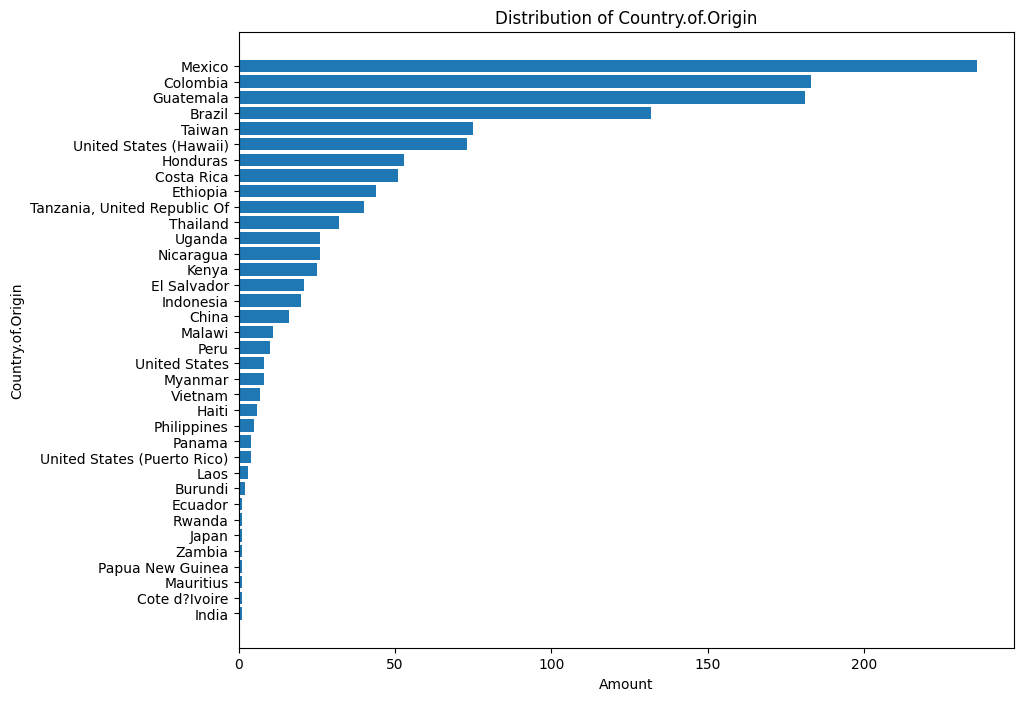

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data selection
data = df['Country.of.Origin'].value_counts()
data = pd.DataFrame(data).sort_values(by='Country.of.Origin', ascending=False)
x = data['Country.of.Origin'].values
y = data.index

# Create a histogram
fig, axs = plt.subplots(figsize=(10, 8))
plt.barh(y, x)

# Add tags and titles
axs.set_xlabel('Amount')
axs.set_ylabel('Country.of.Origin')
axs.set_title('Distribution of Country.of.Origin')

# Reverse the y-axis
ax = plt.gca()
ax.invert_yaxis()

# Displays a histogram
plt.show()

### Coffee bean varieties & the most common varieties

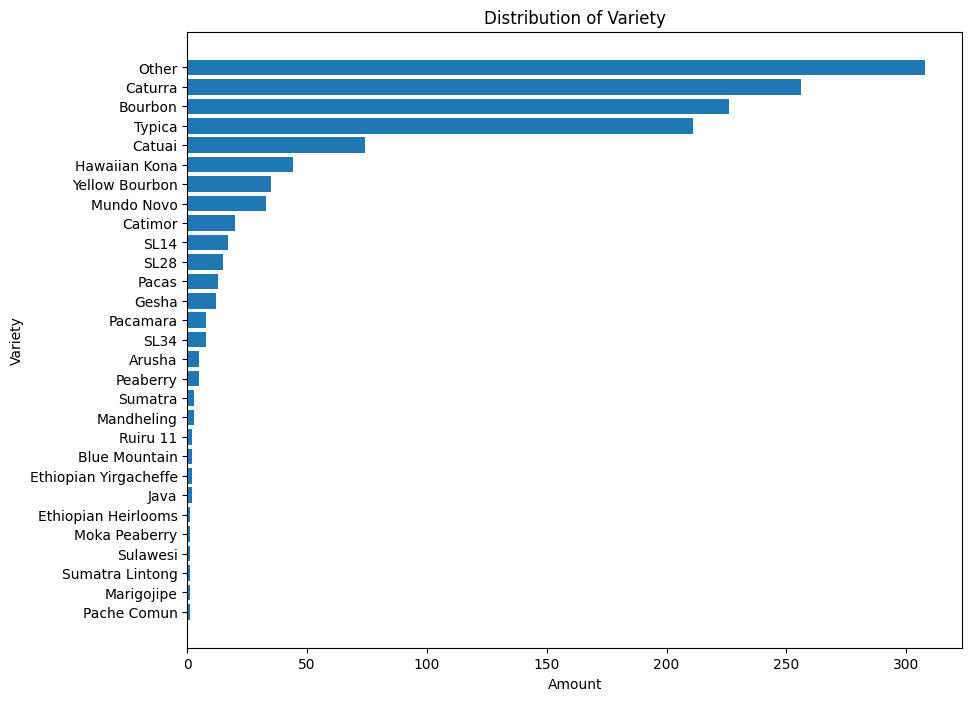

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data selection
Variety_data = df['Variety'].value_counts()
Variety_data = pd.DataFrame(Variety_data).sort_values(by='Variety', ascending=False)
x = Variety_data['Variety'].values
y = Variety_data.index

# Create a histogram
fig, axs = plt.subplots(figsize=(10, 8))
plt.barh(y, x)

# Add tags and titles
axs.set_xlabel('Amount')
axs.set_ylabel('Variety')
axs.set_title('Distribution of Variety')

# Reverse the y-axis
ax = plt.gca()
ax.invert_yaxis()

plt.show()

## Density distribution

### Planting altitude distribution

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df['altitude_mean_meters'].sort_values()

838          1.0
683          1.0
279          1.0
100          1.0
761          1.0
          ...   
1098      4287.0
543      11000.0
1040    110000.0
896     190164.0
1144    190164.0
Name: altitude_mean_meters, Length: 1310, dtype: float64

***The data exploration process***

For the first time, I directly used all the data at average altitude to do a density distribution map, and found that the data range was very large [1,20w].There was no way to visualize the average altitude distribution, so I looked at the data through sorted, and found that there were only a few very high altitude data.In order to better visualize, I deleted the largest 5 data and re-visualized it to observe the distribution of average planting altitude

<ipython-input-16-ef0d728ca8a2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(altitude, shade=True)


<Axes: xlabel='altitude_mean_meters', ylabel='Density'>

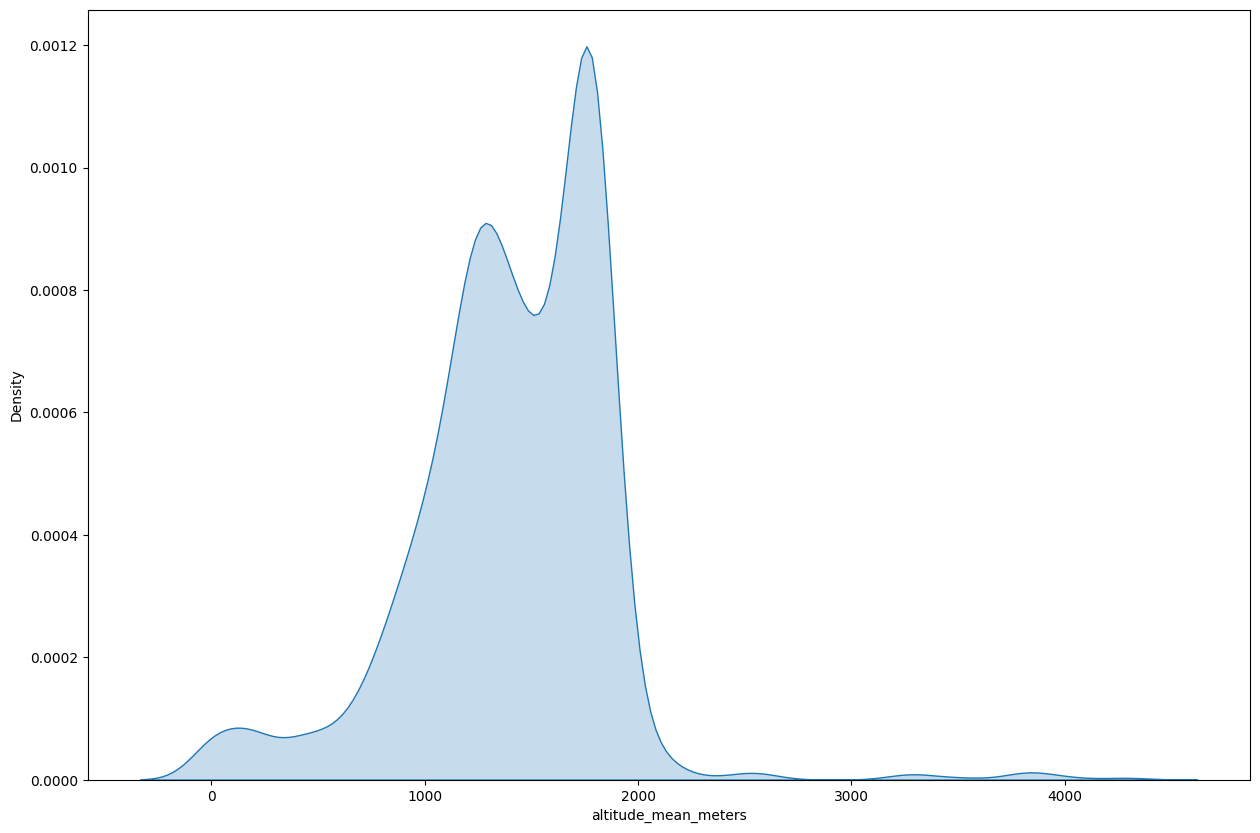

In [ ]:
altitude = df['altitude_mean_meters'].sort_values()[:-4]
fig, axs = plt.subplots(figsize=(15, 10))
sns.kdeplot(altitude, shade=True)

### Distribution of 12 individual scores

<ipython-input-17-260bce43f069>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,ax=axs[row, col])
<ipython-input-17-260bce43f069>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,ax=axs[row, col])
<ipython-input-17-260bce43f069>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,ax=axs[row, col])
<ipython-input-17-260bce43f069>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,ax=axs[row, col])
<ipython-input-17-260bce43f069>:9: FutureWar

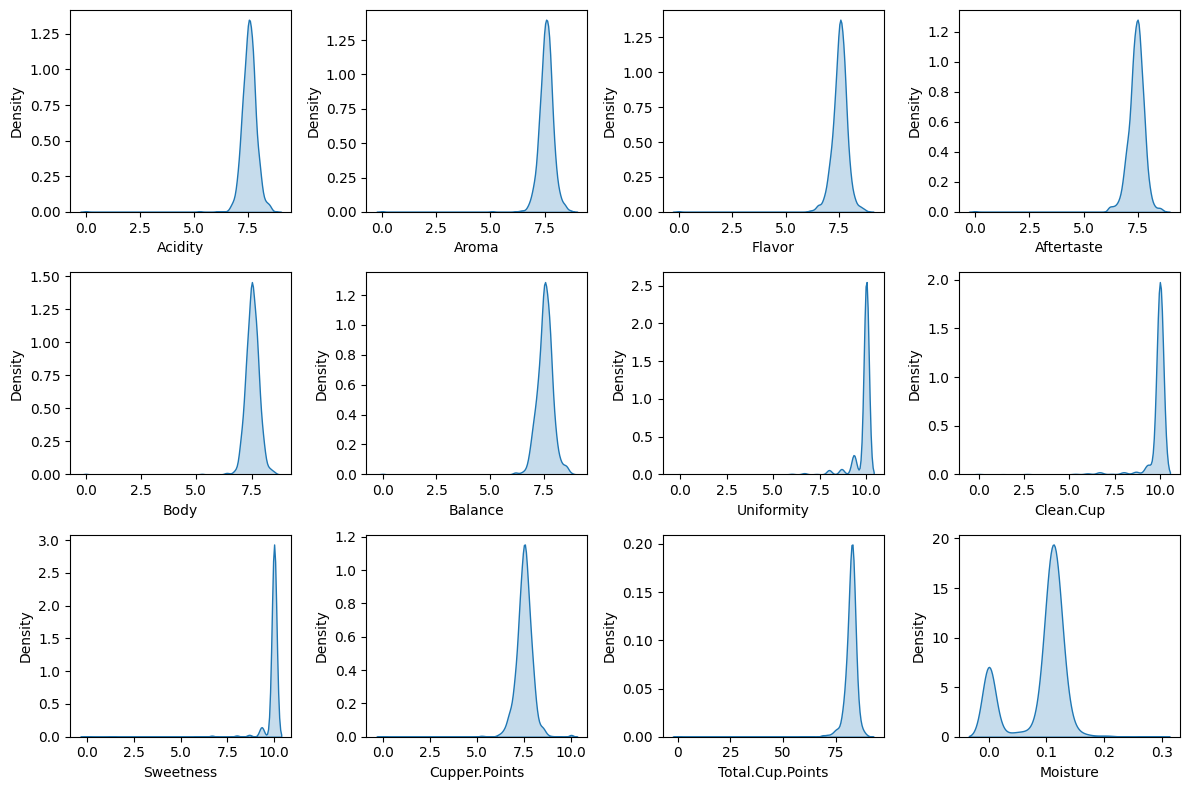

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

titles = ['Acidity', 'Aroma', 'Flavor', 'Aftertaste', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture']

for i, title in enumerate(titles):
    data = df[title]
    row = i // 4
    col = i % 4
    sns.kdeplot(data,shade=True,ax=axs[row, col])
    axs[row, col].set_xlabel(title)
    
fig.tight_layout()
plt.show()

## Box plot

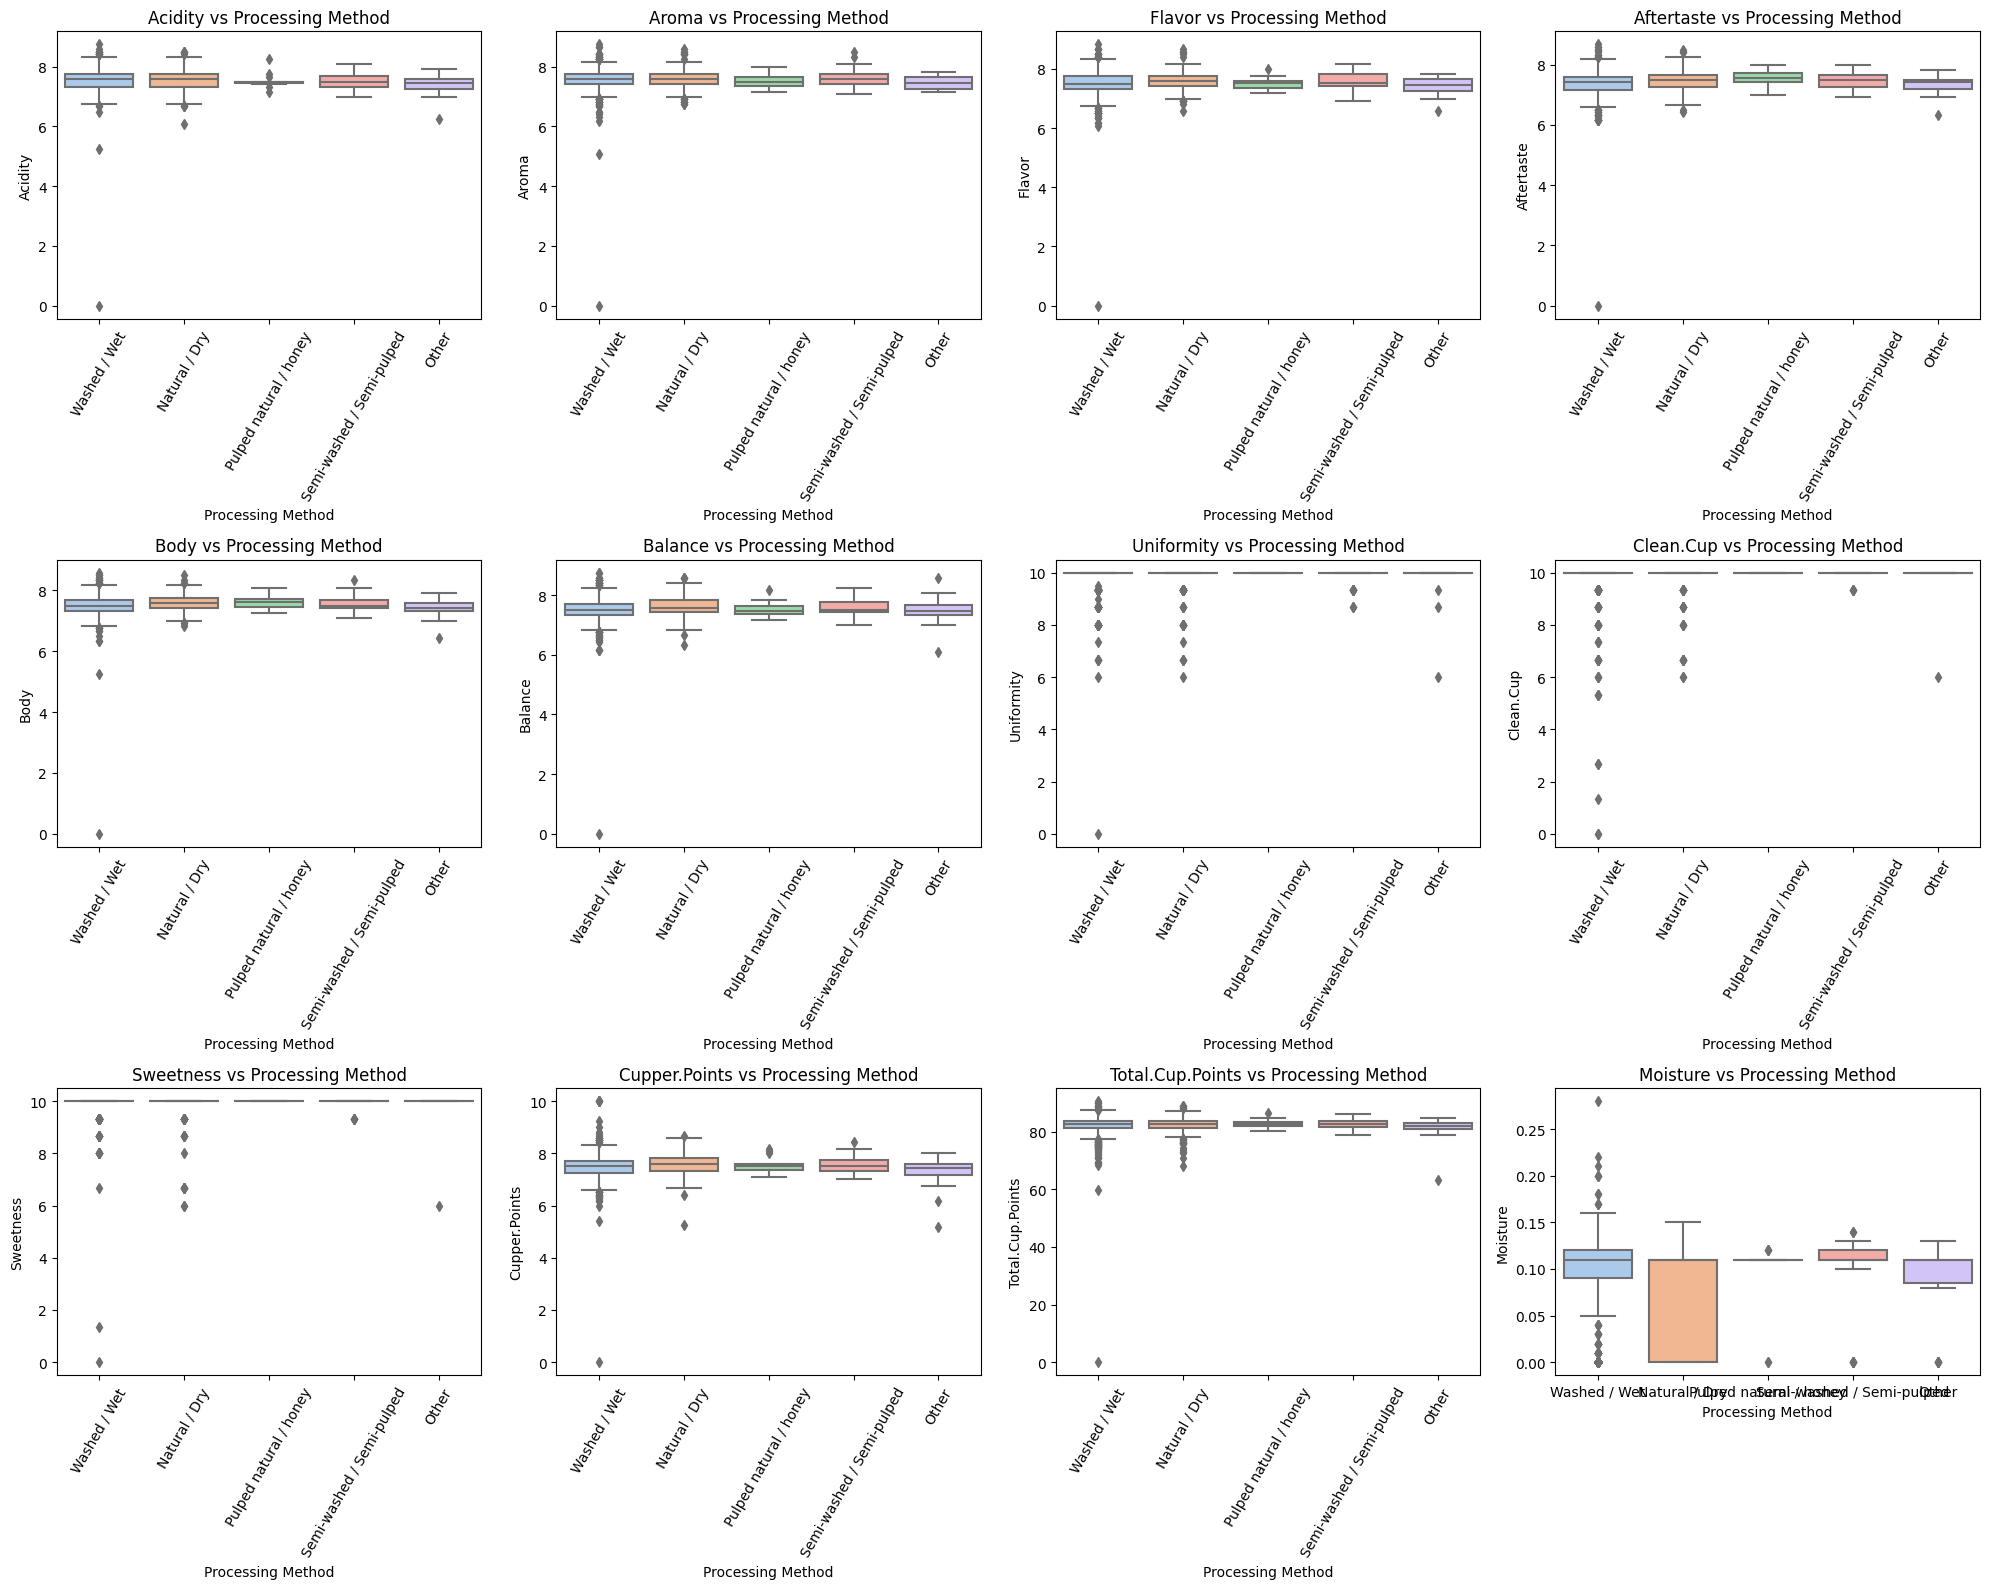

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20, 16))
palette = sns.color_palette("pastel")

#Box plot
sns.boxplot(ax=axs[0, 0], x=df['Processing.Method'], y=df['Acidity'],palette=palette)
axs[0, 0].set_xlabel('Processing Method')
axs[0, 0].set_ylabel('Acidity')
axs[0, 0].set_title('Acidity vs Processing Method')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[0, 1], x=df['Processing.Method'], y=df['Aroma'],palette=palette)
axs[0, 1].set_xlabel('Processing Method')
axs[0, 1].set_ylabel('Aroma')
axs[0, 1].set_title('Aroma vs Processing Method')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[0, 2], x=df['Processing.Method'], y=df['Flavor'],palette=palette)
axs[0, 2].set_xlabel('Processing Method')
axs[0, 2].set_ylabel('Flavor')
axs[0, 2].set_title('Flavor vs Processing Method')
axs[0, 2].set_xticklabels(axs[0, 2].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[0, 3], x=df['Processing.Method'], y=df['Aftertaste'],palette=palette)
axs[0, 3].set_xlabel('Processing Method')
axs[0, 3].set_ylabel('Aftertaste')
axs[0, 3].set_title('Aftertaste vs Processing Method')
axs[0, 3].set_xticklabels(axs[0, 3].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[1, 0], x=df['Processing.Method'], y=df['Body'],palette=palette)
axs[1, 0].set_xlabel('Processing Method')
axs[1, 0].set_ylabel('Body')
axs[1, 0].set_title('Body vs Processing Method')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[1, 1], x=df['Processing.Method'], y=df['Balance'],palette=palette)
axs[1, 1].set_xlabel('Processing Method')
axs[1, 1].set_ylabel('Balance')
axs[1, 1].set_title('Balance vs Processing Method')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[1, 2], x=df['Processing.Method'], y=df['Uniformity'],palette=palette)
axs[1, 2].set_xlabel('Processing Method')
axs[1, 2].set_ylabel('Uniformity')
axs[1, 2].set_title('Uniformity vs Processing Method')
axs[1, 2].set_xticklabels(axs[1, 2].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[1, 3], x=df['Processing.Method'], y=df['Clean.Cup'],palette=palette)
axs[1, 3].set_xlabel('Processing Method')
axs[1, 3].set_ylabel('Clean.Cup')
axs[1, 3].set_title('Clean.Cup vs Processing Method')
axs[1, 3].set_xticklabels(axs[1, 3].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[2, 0], x=df['Processing.Method'], y=df['Sweetness'],palette=palette)
axs[2, 0].set_xlabel('Processing Method')
axs[2, 0].set_ylabel('Sweetness')
axs[2, 0].set_title('Sweetness vs Processing Method')
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[2, 1], x=df['Processing.Method'], y=df['Cupper.Points'],palette=palette)
axs[2, 1].set_xlabel('Processing Method')
axs[2, 1].set_ylabel('Cupper.Points')
axs[2, 1].set_title('Cupper.Points vs Processing Method')
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[2, 2], x=df['Processing.Method'], y=df['Total.Cup.Points'],palette=palette)
axs[2, 2].set_xlabel('Processing Method')
axs[2, 2].set_ylabel('Total.Cup.Points')
axs[2, 2].set_title('Total.Cup.Points vs Processing Method')
axs[2, 2].set_xticklabels(axs[2, 2].get_xticklabels(), rotation=60)

sns.boxplot(ax=axs[2, 3], x=df['Processing.Method'], y=df['Moisture'],palette=palette)
axs[2, 3].set_xlabel('Processing Method')
axs[2, 3].set_ylabel('Moisture')
axs[2, 3].set_title('Moisture vs Processing Method')

# Adjust the subgraph spacing
fig.tight_layout()

plt.show()

The number of coffee beans of different grades

## Rating

In [ ]:
# Professional barista tasting: filter for values greater than or equal to 7
df1= df[df['Cupper.Points'] >= 7.0].dropna(how='any')
df1

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
1,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,0,0.0,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000
3,Arabica,Ethiopia,oromia,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Other,Natural / Dry,...,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,m,1800.000000,2200.000000,2000.000000
4,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,Arabica,United States (Hawaii),kona,3,100 lbs,Specialty Coffee Association,2014,"March 13th, 2014",Hawaiian Kona,Natural / Dry,...,1,0.0,Blue-Green,2,"March 13th, 2015",Specialty Coffee Association,ft,1759.548954,1808.843803,1784.196379
1289,Arabica,Mexico,coatepec,20,1 kg,AMECAFE,2012,"August 1st, 2012",Typica,Washed / Wet,...,0,0.0,Green,19,"August 1st, 2013",AMECAFE,m,1250.000000,1250.000000,1250.000000
1290,Arabica,United States (Hawaii),kona,22,100 lbs,Specialty Coffee Association,2012,"April 6th, 2012",Hawaiian Kona,Natural / Dry,...,9,0.0,None,17,"April 6th, 2013",Specialty Coffee Association,ft,1759.548954,1808.843803,1784.196379
1292,Arabica,Honduras,intibuca,275,2 kg,Instituto Hondureño del Café,2014,"April 26th, 2014",Pacas,Washed / Wet,...,1,0.0,Green,16,"April 26th, 2015",Instituto Hondureño del Café,m,1350.000000,1350.000000,1350.000000


In [ ]:
# The balance between the various elements of coffee: filter the value greater than or equal to 7
df2 = df1[df1['Balance'] >= 7.0].dropna(how='any')
df2

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
1,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,0,0.0,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000
3,Arabica,Ethiopia,oromia,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Other,Natural / Dry,...,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,m,1800.000000,2200.000000,2000.000000
4,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Arabica,Mexico,coatepec,20,1 kg,AMECAFE,2012,"August 1st, 2012",Typica,Washed / Wet,...,0,0.0,Green,30,"August 1st, 2013",AMECAFE,m,1250.000000,1250.000000,1250.000000
1285,Arabica,United States (Hawaii),kona,3,100 lbs,Specialty Coffee Association,2014,"March 13th, 2014",Hawaiian Kona,Natural / Dry,...,1,0.0,Blue-Green,2,"March 13th, 2015",Specialty Coffee Association,ft,1759.548954,1808.843803,1784.196379
1289,Arabica,Mexico,coatepec,20,1 kg,AMECAFE,2012,"August 1st, 2012",Typica,Washed / Wet,...,0,0.0,Green,19,"August 1st, 2013",AMECAFE,m,1250.000000,1250.000000,1250.000000
1292,Arabica,Honduras,intibuca,275,2 kg,Instituto Hondureño del Café,2014,"April 26th, 2014",Pacas,Washed / Wet,...,1,0.0,Green,16,"April 26th, 2015",Instituto Hondureño del Café,m,1350.000000,1350.000000,1350.000000


In [ ]:
# Clean.Cup does not contain impurities, cleanliness and taste: filter values greater than or equal to 9
df3 = df2[df2['Clean.Cup'] >= 9.0].dropna(how='any')
df3

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
1,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,0,0.0,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000
3,Arabica,Ethiopia,oromia,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Other,Natural / Dry,...,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,m,1800.000000,2200.000000,2000.000000
4,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Arabica,China,yunnan,16,2 kg,Specialty Coffee Association,2013,"September 5th, 2013",Typica,Washed / Wet,...,0,0.0,Green,28,"September 5th, 2014",Specialty Coffee Association,m,1200.000000,1200.000000,1200.000000
1240,Arabica,Mexico,"motozintla, chiapas",10,1 kg,AMECAFE,2012,"September 11th, 2012",Other,Washed / Wet,...,2,0.0,Green,7,"September 11th, 2013",AMECAFE,m,850.000000,850.000000,850.000000
1241,Arabica,Colombia,Unknown,202,70 kg,Specialty Coffee Association,2012,"December 1st, 2011",Other,Washed / Wet,...,1,0.0,Green,3,"November 30th, 2012",Specialty Coffee Association,m,1759.548954,1808.843803,1784.196379
1249,Arabica,United States (Hawaii),kona,5,100 lbs,Specialty Coffee Association,2013,"May 3rd, 2013",Other,Natural / Dry,...,1,0.0,Green,5,"May 3rd, 2014",Specialty Coffee Association,ft,1759.548954,1808.843803,1784.196379


In [ ]:
# Stability of Uniformity coffee: filter for values greater than or equal to 8.5
df_bestCoffee = df3[df3['Uniformity'] >= 8.5].dropna(how='any')
df_bestCoffee

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
1,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,0,0.0,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000
3,Arabica,Ethiopia,oromia,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Other,Natural / Dry,...,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,m,1800.000000,2200.000000,2000.000000
4,Arabica,Ethiopia,guji-hambela,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Other,Washed / Wet,...,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.000000,2200.000000,2075.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Arabica,China,yunnan,16,2 kg,Specialty Coffee Association,2013,"September 5th, 2013",Typica,Washed / Wet,...,0,0.0,Green,28,"September 5th, 2014",Specialty Coffee Association,m,1200.000000,1200.000000,1200.000000
1240,Arabica,Mexico,"motozintla, chiapas",10,1 kg,AMECAFE,2012,"September 11th, 2012",Other,Washed / Wet,...,2,0.0,Green,7,"September 11th, 2013",AMECAFE,m,850.000000,850.000000,850.000000
1241,Arabica,Colombia,Unknown,202,70 kg,Specialty Coffee Association,2012,"December 1st, 2011",Other,Washed / Wet,...,1,0.0,Green,3,"November 30th, 2012",Specialty Coffee Association,m,1759.548954,1808.843803,1784.196379
1249,Arabica,United States (Hawaii),kona,5,100 lbs,Specialty Coffee Association,2013,"May 3rd, 2013",Other,Natural / Dry,...,1,0.0,Green,5,"May 3rd, 2014",Specialty Coffee Association,ft,1759.548954,1808.843803,1784.196379


In [ ]:
# select three columns
df_selected = df_bestCoffee[['Cupper.Points', 'Balance', 'Clean.Cup']]

# Assign weights respectively
weights = [0.6, 0.2, 0.2]

# Calculate the weighted sum and assign it to the new column
df_bestCoffee['rating'] = (df_selected * weights).sum(axis=1)

df_bestCoffee = df_bestCoffee.sort_values(by='rating', ascending=False)

df_bestCoffee

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,rating
352,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2016 / 2017,"February 13th, 2017",Other,Washed / Wet,...,0.0,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400
379,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2015,"February 13th, 2017",Other,Washed / Wet,...,0.0,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400
735,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2016/2017,"February 13th, 2017",Other,Washed / Wet,...,0.0,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400
636,Arabica,Taiwan,changhua baguashan 彰化市八卦山,1,10 kg,Blossom Valley International,2016 / 2017,"February 13th, 2017",Other,Washed / Wet,...,0.0,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,200.000000,200.000000,200.000000,9.400
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,0.0,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000,9.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Arabica,Taiwan,changhua baguashan 彰化市八卦山,10,30 kg,Blossom Valley International,2013/2014,"December 26th, 2013",Typica,Washed / Wet,...,0.0,Green,0,"December 26th, 2014",Blossom Valley International,m,250.000000,250.000000,250.000000,7.600
1238,Arabica,China,yunnan,16,2 kg,Specialty Coffee Association,2013,"September 5th, 2013",Typica,Washed / Wet,...,0.0,Green,28,"September 5th, 2014",Specialty Coffee Association,m,1200.000000,1200.000000,1200.000000,7.568
1199,Arabica,Peru,san ignacio,280,69 kg,Specialty Coffee Association,2012,"January 8th, 2013",Typica,Washed / Wet,...,0.0,None,4,"January 8th, 2014",Specialty Coffee Association,m,1400.000000,1400.000000,1400.000000,7.566
1241,Arabica,Colombia,Unknown,202,70 kg,Specialty Coffee Association,2012,"December 1st, 2011",Other,Washed / Wet,...,0.0,Green,3,"November 30th, 2012",Specialty Coffee Association,m,1759.548954,1808.843803,1784.196379,7.548


In [ ]:
bins = [0, 7.999, 8.999, 10]
labels = ['medium', 'good', 'excellent']
df_bestCoffee['rating_group'] = pd.cut(df_bestCoffee['rating'], bins, labels=labels)
df_bestCoffee

,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,...,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,rating,rating_group
352,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2016 / 2017,"February 13th, 2017",Other,Washed / Wet,...,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400,excellent
379,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2015,"February 13th, 2017",Other,Washed / Wet,...,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400,excellent
735,Arabica,Taiwan,Unknown,1,10 kg,Blossom Valley International,2016/2017,"February 13th, 2017",Other,Washed / Wet,...,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,1759.548954,1808.843803,1784.196379,9.400,excellent
636,Arabica,Taiwan,changhua baguashan 彰化市八卦山,1,10 kg,Blossom Valley International,2016 / 2017,"February 13th, 2017",Other,Washed / Wet,...,Blue-Green,0,"February 13th, 2018",Blossom Valley International,m,200.000000,200.000000,200.000000,9.400,excellent
2,Arabica,Guatemala,Unknown,5,1,Specialty Coffee Association,2012,"May 31st, 2010",Bourbon,Washed / Wet,...,None,0,"May 31st, 2011",Specialty Coffee Association,m,1600.000000,1800.000000,1700.000000,9.234,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Arabica,Taiwan,changhua baguashan 彰化市八卦山,10,30 kg,Blossom Valley International,2013/2014,"December 26th, 2013",Typica,Washed / Wet,...,Green,0,"December 26th, 2014",Blossom Valley International,m,250.000000,250.000000,250.000000,7.600,medium
1238,Arabica,China,yunnan,16,2 kg,Specialty Coffee Association,2013,"September 5th, 2013",Typica,Washed / Wet,...,Green,28,"September 5th, 2014",Specialty Coffee Association,m,1200.000000,1200.000000,1200.000000,7.568,medium
1199,Arabica,Peru,san ignacio,280,69 kg,Specialty Coffee Association,2012,"January 8th, 2013",Typica,Washed / Wet,...,None,4,"January 8th, 2014",Specialty Coffee Association,m,1400.000000,1400.000000,1400.000000,7.566,medium
1241,Arabica,Colombia,Unknown,202,70 kg,Specialty Coffee Association,2012,"December 1st, 2011",Other,Washed / Wet,...,Green,3,"November 30th, 2012",Specialty Coffee Association,m,1759.548954,1808.843803,1784.196379,7.548,medium


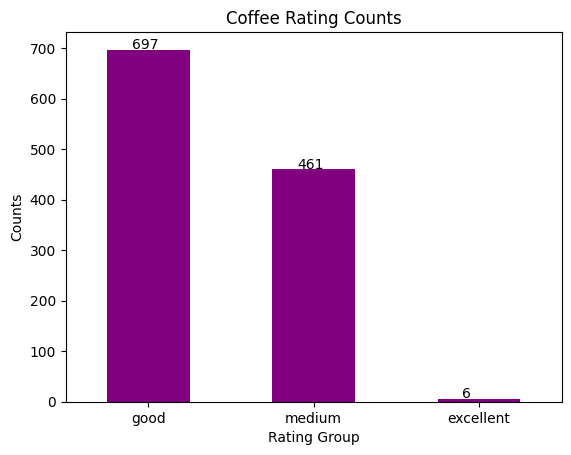

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Count the number of individual groups
rating_counts = df_bestCoffee['rating_group'].value_counts()

# Set up the graphic
fig, ax = plt.subplots()
ax = rating_counts.plot.bar(rot=0, color='purple')

# Add tags
for i, v in enumerate(rating_counts):
    ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=10)

plt.title('Coffee Rating Counts')
plt.xlabel('Rating Group')
plt.ylabel('Counts')

plt.show()

## Pie chart

### What are the processing methods?

In [ ]:
Processing_Method = df['Processing.Method'].value_counts()
Processing_Method

Washed / Wet                 963
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

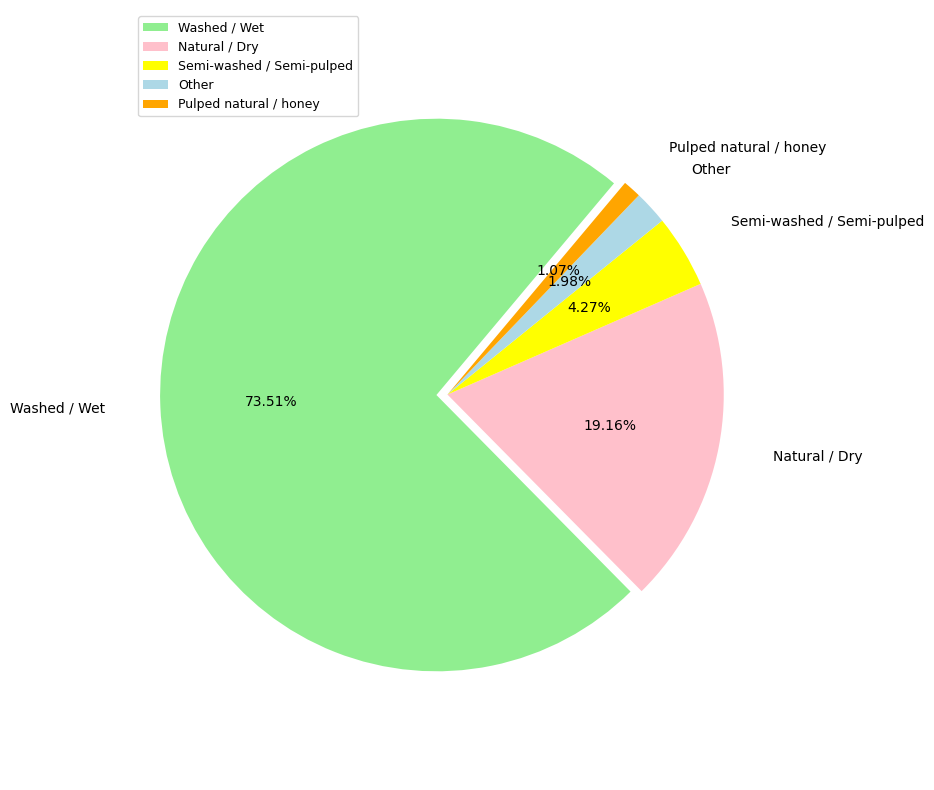

In [ ]:
Processing_Method = df['Processing.Method'].value_counts()

plt.figure(figsize=(8,10)) #Resize the graphic
labels = Processing_Method.index #Define labels
sizes = Processing_Method.values.tolist() #The value of each block
colors = ['lightgreen','pink','yellow','lightblue','orange'] #The color definition of each block
explode = (0.04,0,0,0,0) #Divide a piece, the larger the value, the larger the gap
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,#The legend is twice the distance from the radius of the center of the circle
                      autopct = '%3.2f%%', #Values retain a fixed decimal place
                      shadow = False, #No shadow setting
                      startangle =50, #Counterclockwise start angle setting
                      pctdistance = 0.6) #The distance of the value from the multiple of the radius of the center of the circle
#The return value of the patches pie chart, texts1 pie chart outer label text, texts2 pie chart inner text
# The x,y axis scale is set consistently, ensuring that the pie chart is circular
plt.axis('equal')
plt.legend(loc='upper left',fontsize = 9)
plt.show()

In [ ]:
df[df['Processing.Method']=='Washed / Wet']['Country.of.Origin'].value_counts()

Mexico                          205
Guatemala                       169
Colombia                        156
Costa Rica                       47
Taiwan                           42
Honduras                         39
Tanzania, United Republic Of     38
United States (Hawaii)           33
Thailand                         29
Ethiopia                         27
Kenya                            23
Brazil                           20
Nicaragua                        19
El Salvador                      19
Uganda                           18
China                            12
Malawi                           11
Peru                             10
Indonesia                         9
United States                     6
Myanmar                           5
Haiti                             5
United States (Puerto Rico)       4
Philippines                       4
Laos                              3
Panama                            2
Burundi                           2
Rwanda                      

### Color distribution of coffee beans

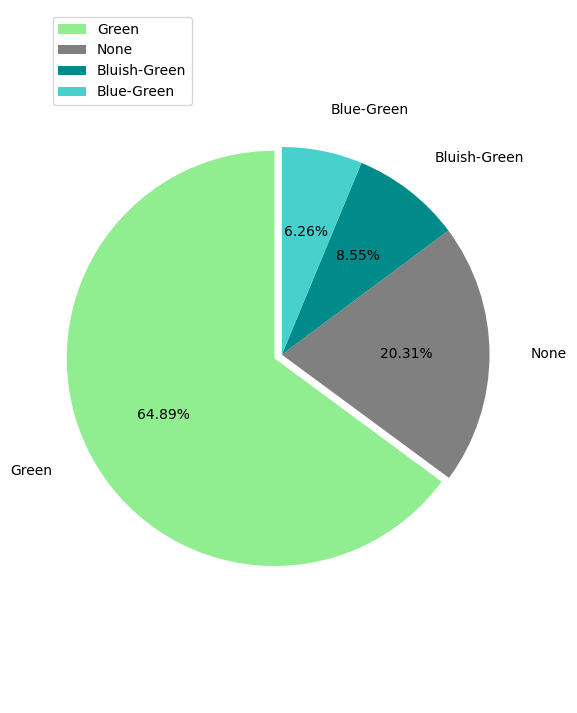

In [ ]:
Color = df['Color'].value_counts()

plt.figure(figsize=(6,9)) #Resize the graphic
labels = Color.index 
sizes = Color.values.tolist() 
colors = ['lightgreen','grey','darkcyan','mediumturquoise'] 
explode = (0.04,0,0,0) #Divide a piece, the larger the value, the larger the gap
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,#The legend is twice the distance from the radius of the center of the circle
                      autopct = '%3.2f%%', #Values retain a fixed decimal place
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 

plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

### Distribution of high-quality coffee beans in different countries

In [ ]:
# Group df_bestCoffee 
grouped = df_bestCoffee.groupby('Country.of.Origin')
# Calculate the number of 'good' and 'excellent' scores for each group
group_counts = grouped['rating_group'].value_counts().unstack().loc[:, ['good']]

# Save the results to a new DataFrame
df_counts = pd.DataFrame({'good': group_counts['good']})
df_counts = df_counts.sort_values(by='good', ascending=False)
# Display the results
display(df_counts)

,good
Country.of.Origin,
Colombia,143
Guatemala,84
Mexico,78
Brazil,74
Ethiopia,41
United States (Hawaii),38
Costa Rica,33
Taiwan,26
Uganda,24


In [ ]:
import plotly.express as px

# Filter the DataFrame based on the number of "good"
df_counts_filtered = df_counts.loc[df_counts['good'] > 20]

# Create a data frame
df_pie = pd.DataFrame({'Counts': df_counts_filtered['good']})
df_pie.index.name = 'Country of Origin'

# Calculates the total number of all values to calculate the percentage
total_count = df_pie['Counts'].sum()
df_pie['Percent'] = round((df_pie['Counts'] / total_count) * 100, 2)

# Draw a pie chart and add labels and percentages
fig = px.pie(df_pie, values='Percent', names=df_pie.index, title='Good Coffee Counts by Country')
fig.for_each_trace(lambda t: t.update(textposition='inside', textinfo='label+percent'))

# Displays a pie chart
fig.show()

## Donut chart

In [ ]:
# Group df_bestCoffee 
grouped = df_bestCoffee.groupby('Variety')

# Calculate the number of good scores per group
group_counts = grouped['rating_group'].value_counts().unstack().loc[:, ['good']]

# Save the results to a new DataFrame
df_counts = pd.DataFrame({'good': group_counts['good']})
df_counts = df_counts.sort_values(by='good', ascending=False)

display(df_counts)

,good
Variety,
Other,181
Caturra,177
Bourbon,105
Typica,65
Catuai,27
Yellow Bourbon,24
Hawaiian Kona,22
Catimor,16
SL14,15


In [ ]:
df_counts_filtered = df_counts.loc[df_counts['good'] > 10]
type(df_counts_filtered)

pandas.core.frame.DataFrame

In [ ]:
df_counts_filtered['good']

Variety
Other             181
Caturra           177
Bourbon           105
Typica             65
Catuai             27
Yellow Bourbon     24
Hawaiian Kona      22
Catimor            16
SL14               15
SL28               13
Mundo Novo         11
Name: good, dtype: int64

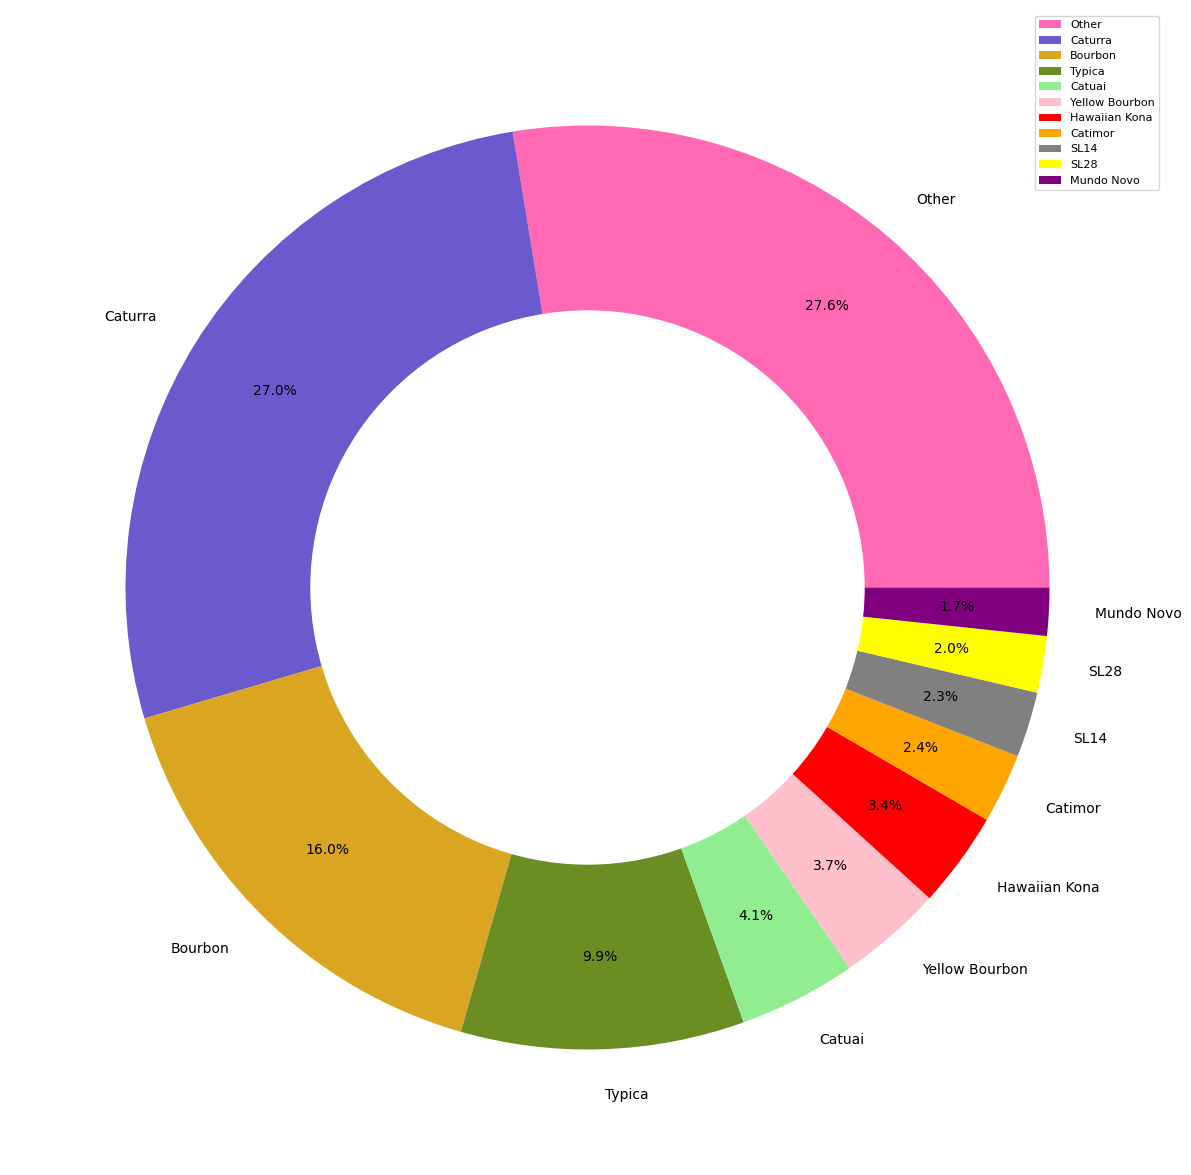

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
 
#Take the data from the last row in the dataframe to draw a pie chart
x = df_counts_filtered['good'].values.tolist()
x_0 = [1,0,0,0]#Used to display hollows
 
plt.figure(figsize=(15,15))#Sets the dimensions of the canvas
labels = df_counts_filtered['good'].index
colors = ['hotpink','slateblue','goldenrod','olivedrab','lightgreen','pink','red','orange','grey','yellow','purple']
 
plt.pie(x  , radius=1.0,pctdistance = 0.8, colors=colors,startangle=0,labels=labels,autopct='%1.1f%%')
plt.pie(x_0, radius=0.6,colors = 'w')
plt.legend(labels,loc='upper right',fontsize = 8)

plt.show()

## Heat map


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

# Read in the dataset
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/arabica_data_cleaned_python.csv')

# Create a geolocator object
geolocator = Nominatim(user_agent="coffee_regions")

# Define a function to get the coordinates for a region
def get_coordinates(region):
    try:
        # Use the geolocator object to get the coordinates for the region
        location = geolocator.geocode(region)
        return (location.latitude, location.longitude)
    except:
        # If the coordinates cannot be obtained, return None
        return None

# Apply the get_coordinates function to the "Region" column and create new "Latitude" and "Longitude" columns
df[['Latitude', 'Longitude']] = df['Region'].apply(lambda x: pd.Series(get_coordinates(x)))

# Save the updated dataset to a new CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/arabica_data_with_coordinates.csv', index=False)


<ipython-input-36-648e00733f86>:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-36-648e00733f86>:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-36-648e00733f86>:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-36-648e00733f86>:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-36-648e00733f86>:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipyt

In [ ]:
# installation
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=1e492a26150ac2587e8295407e5cffac4434761136e2d509828996db201133d7
  Stored in directory: /root/.cache/pip/wheels/66/ab/29/3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
Enabling notebook extension jupyter-gmaps/extension...
Paths used for configuration of notebook: 
    	/usr/

In [ ]:
# enable third-party jupeter widgets
from google.colab import output
import gmaps
output.enable_custom_widget_manager()

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/arabica_data_with_coordinates.csv')
df2.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# World wide map on Covid
locations = df2[['Latitude', 'Longitude']]
points = df2['Total.Cup.Points']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=points, max_intensity=100, point_radius=10.0))#max_intensity指对应热图梯度中最热颜色的数值。任何密度大于这个值的点都会被映射成最热的颜色。
fig

Figure(layout=FigureLayout(height='420px'))

## Stacked chart

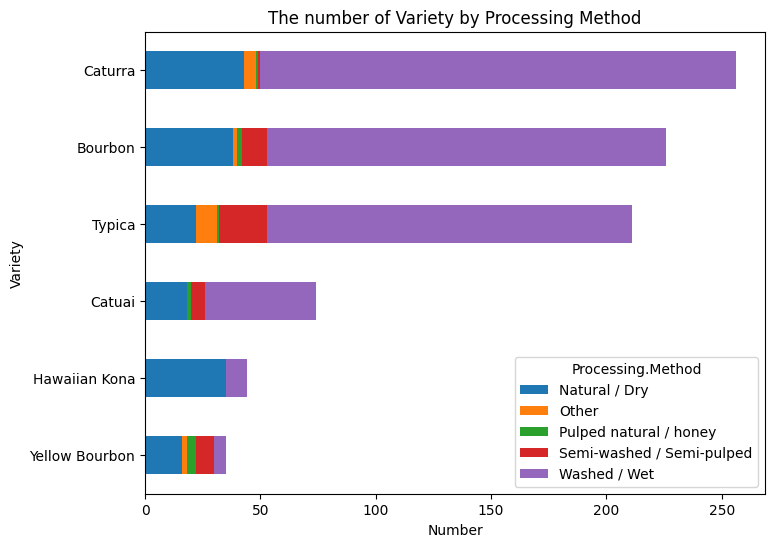

In [ ]:
Variety_data = df[df['Variety'] != 'Other'].groupby('Variety').size().sort_values(ascending=False).head(6)
Variety_data = Variety_data.to_frame()

grouped_data = df.groupby(['Variety', 'Processing.Method']).size().unstack()
grouped_data = grouped_data.loc[Variety_data.index]

grouped_data = grouped_data.reindex(Variety_data.index[::-1])

ax = grouped_data.plot(kind='barh', stacked=True, figsize=(8, 6))

ax.set_xlabel('Number')
ax.set_ylabel('Variety')
ax.set_title('The number of Variety by Processing Method')

plt.show()

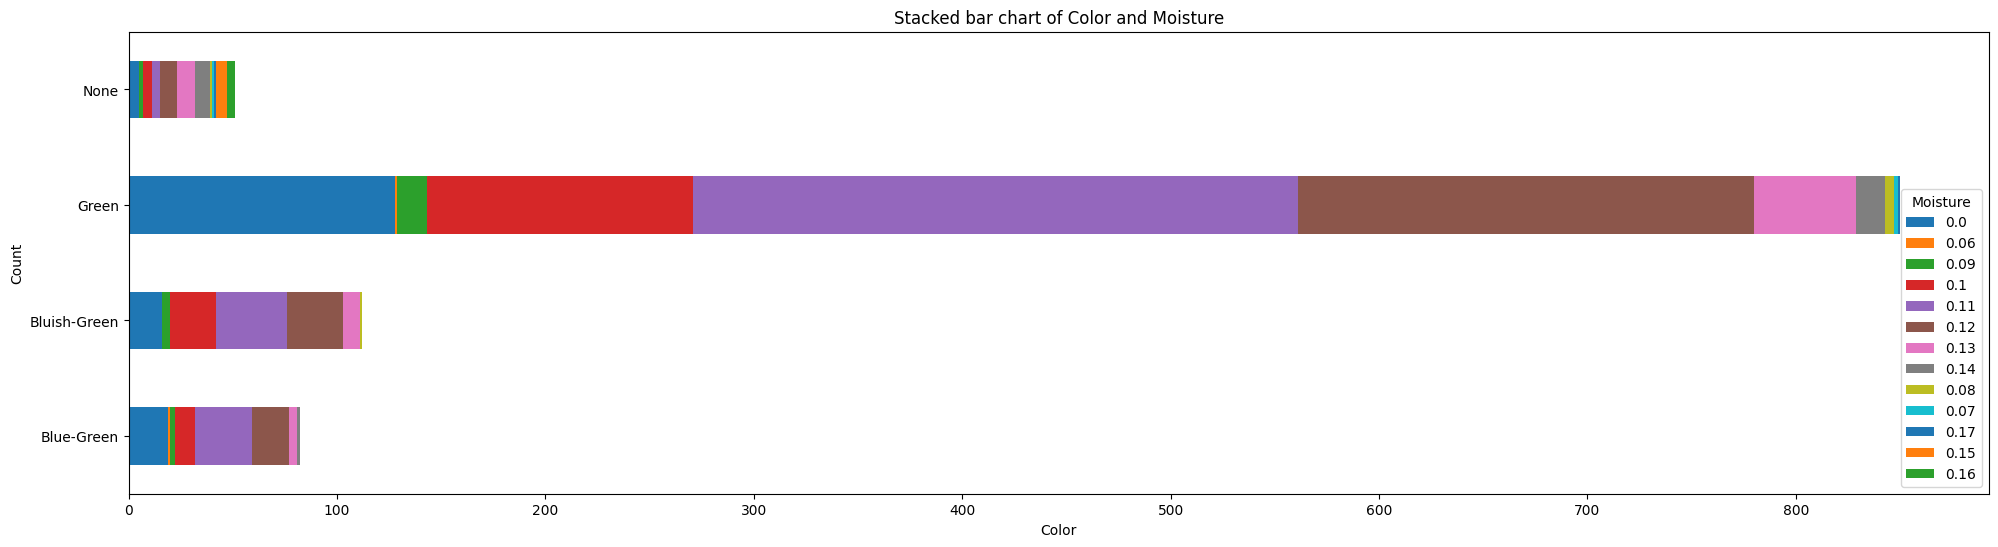

In [ ]:
sh = pd.read_csv(figuresPath)
sh_select = sh[["Color", "Moisture"]]

# Group by color and humidity, and calculate the number of each group
grouped = sh_select.groupby(["Color", "Moisture"]).size().unstack()

fig, ax = plt.subplots(figsize=(24,6))
grouped.plot(kind='barh', stacked=True, ax=ax)
plt.title("Stacked bar chart of Color and Moisture")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Moisture",loc = "lower right")
plt.show()